## Web scraping and analysis


### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [22]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

"""
To fetch 1000 customer reviews of British Airways from 10 pages (100 per page) on the website,
extract the review text, and store them in the list: "reviews"
""""
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [ ]:
# Base URL of the British Airways reviews page
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"

# Number of pages to scrape (10 pages in total)
pages = 10

# Number of reviews to scrape per page (100 reviews per page)
page_size = 100

# List to store the extracted reviews
reviews = []

"""
This loop iterates through 10 pages to fetch 1000 customer reviews of British Airways 
from the website. It extracts the review text from each page and appends it to the 
'reviews' list.
"""
for i in range(1, pages + 1):

    # Print the page number currently being scraped for tracking purposes
    print(f"Scraping page {i}")

    # Create the URL for the specific page by inserting the page number and page size (pagination)
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Send a GET request to the server to collect the HTML content of the page
    response = requests.get(url)

    # Get the content of the page (HTML source code)
    content = response.content

    # Parse the HTML content using BeautifulSoup to enable HTML data extraction
    parsed_content = BeautifulSoup(content, 'html.parser')

    # Loop through all the 'div' elements with the class 'text_content' that contain the reviews
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        # Extract and clean the review text, then add it to the 'reviews' list
        reviews.append(para.get_text())
    
    # Print the total number of reviews collected so far
    print(f"   ---> {len(reviews)} total reviews")


If the URL does not include pagination (i.e., `url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}")`, the script would only scrape the first page of reviews repeatedly. In this case, you would keep fetching the reviews from the same page (page 1), resulting in duplicated data.

Without pagination, the loop wouldn't advance to the subsequent pages, which means you'd only get reviews from the first page instead of scraping reviews from multiple pages, like pages 2 to 10. Consequently, the code would not reach the desired total of 1000 reviews; it would just keep collecting the same set of reviews from page 1 multiple times.

In [25]:
rev_df = pd.DataFrame()
rev_df["reviews"] = reviews
rev_df.head()

,reviews
0,✅ Trip Verified | I haven't flown British Air...
1,Not Verified | My itinerary was supposed to b...
2,✅ Trip Verified | Busy day at LHR and flight ...
3,✅ Trip Verified | Worst seats I have ever enco...
4,Not Verified | Top Ten REASONS to not use Brit...


In [9]:
rev_df.shape

(1000, 1)

The loops above collected 1000 reviews by iterating through the paginated pages on the website. 

Next we clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

Removing the parts before "|" in the reviews column

In [26]:
rev_df.reviews= rev_df.reviews.str.split('|',expand=True)[1]
rev_df.head()

,reviews
0,I haven't flown British Airways before and w...
1,My itinerary was supposed to be Las Vegas-Ch...
2,Busy day at LHR and flight full. Lounge crow...
3,Worst seats I have ever encountered in econom...
4,Top Ten REASONS to not use British Airways To...


**Rule-based approach**

This is a practical approach to analyzing text without training or using machine learning models. The result of this approach is a set of rules based on which the text is labeled as positive/negative/neutral. These rules are also known as lexicons. Hence, the Rule-based approach is called Lexicon based approach.

Widely used lexicon-based approaches are TextBlob, VADER and SentiWordNet.

**Data preprocessing steps:**

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

# Cleaning the text

In [27]:
import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

In [28]:
# Cleaning the text in the review column
rev_df['Cleaned Reviews'] = rev_df['reviews'].apply(clean)
rev_df.head()

,reviews,Cleaned Reviews
0,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...
1,My itinerary was supposed to be Las Vegas-Ch...,My itinerary was supposed to be Las Vegas Chi...
2,Busy day at LHR and flight full. Lounge crow...,Busy day at LHR and flight full Lounge crowde...
3,Worst seats I have ever encountered in econom...,Worst seats I have ever encountered in econom...
4,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...


In [13]:
#pd.set_option('display.max_colwidth', None)

In [24]:
# Reset the display option to default for max_colwidth
pd.reset_option('display.max_colwidth')

In [29]:
rev_df.head(1)

,reviews,Cleaned Reviews
0,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...


# Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentence(sentence tokenization) or word level(word tokenization).

# Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging is essential to preserve the context of the word and is essential for Lemmatization.

# Stopwords removal
Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. The library nltk has a list of stopwords of every language. 

# Obtaining the stem words
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.


 
```
NLTK is a leading platform for building Python programs to work with human language data. 

```

```
It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along 
with a suite of text processing libraries for classification, tokenization, stemming, tagging, 
parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries
```




In [16]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

#nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
#nltk.download('stopwords')
from nltk.corpus import stopwords
#nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...


In [30]:
#The nltk.corpus package defines a collection of corpus reader classes, which can be used to access the contents of a diverse set of corpora.


#nltk.download('omw-1.4')
#nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
          #print(tag[0])
          #print(pos_dict.get(tag[0]))
    return newlist 

rev_df['POS tagged'] = rev_df['Cleaned Reviews'].apply(token_stop_pos)
rev_df.head()

,reviews,Cleaned Reviews,POS tagged
0,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...,"[(flown, a), (British, a), (Airways, n), (neve..."
1,My itinerary was supposed to be Las Vegas-Ch...,My itinerary was supposed to be Las Vegas Chi...,"[(itinerary, n), (supposed, v), (Las, n), (Veg..."
2,Busy day at LHR and flight full. Lounge crow...,Busy day at LHR and flight full Lounge crowde...,"[(Busy, a), (day, n), (LHR, n), (flight, n), (..."
3,Worst seats I have ever encountered in econom...,Worst seats I have ever encountered in econom...,"[(Worst, n), (seats, n), (ever, r), (encounter..."
4,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (..."


In [31]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev

rev_df['Lemma'] = rev_df['POS tagged'].apply(lemmatize)
rev_df.head(1)

,reviews,Cleaned Reviews,POS tagged,Lemma
0,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check proces...


In [32]:
rev_df[['reviews','Lemma']]

,reviews,Lemma
0,I haven't flown British Airways before and w...,flown British Airways never fly check proces...
1,My itinerary was supposed to be Las Vegas-Ch...,itinerary suppose Las Vegas Chicago London V...
2,Busy day at LHR and flight full. Lounge crow...,Busy day LHR flight full Lounge crowd B gate...
3,Worst seats I have ever encountered in econom...,Worst seat ever encounter economy class leg ...
4,Top Ten REASONS to not use British Airways To...,Top Ten REASONS use British Airways Aware No...
...,...,...
995,Jeddah to Chicago via London. The flight fro...,Jeddah Chicago via London flight Jeddah Heat...
996,London to Frankfurt. I need to fly BA for Bu...,London Frankfurt need fly BA Business freque...
997,"Gatwick to Malaga. When booking the tickets, ...",Gatwick Malaga book ticket realise choose ce...
998,Bermuda to Gatwick. Usual window and Aisle s...,Bermuda Gatwick Usual window Aisle seat take...


# Sentiment Analysis using VADER

VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative, but does that along with the intensity of emotion.

In [33]:
!pip install vaderSentiment

     ------------------------------------ 126.0/126.0 kB 570.0 kB/s eta 0:00:00


In [34]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

rev_df['Sentiment'] = rev_df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
rev_df['Analysis'] = rev_df['Sentiment'].apply(vader_analysis)
rev_df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,I haven't flown British Airways before and w...,I haven t flown British Airways before and wi...,"[(flown, a), (British, a), (Airways, n), (neve...",flown British Airways never fly check proces...,-0.7584,Negative
1,My itinerary was supposed to be Las Vegas-Ch...,My itinerary was supposed to be Las Vegas Chi...,"[(itinerary, n), (supposed, v), (Las, n), (Veg...",itinerary suppose Las Vegas Chicago London V...,-0.8271,Negative
2,Busy day at LHR and flight full. Lounge crow...,Busy day at LHR and flight full Lounge crowde...,"[(Busy, a), (day, n), (LHR, n), (flight, n), (...",Busy day LHR flight full Lounge crowd B gate...,0.9524,Positive
3,Worst seats I have ever encountered in econom...,Worst seats I have ever encountered in econom...,"[(Worst, n), (seats, n), (ever, r), (encounter...",Worst seat ever encounter economy class leg ...,-0.8555,Negative
4,Top Ten REASONS to not use British Airways To...,Top Ten REASONS to not use British Airways To...,"[(Top, a), (Ten, n), (REASONS, n), (use, v), (...",Top Ten REASONS use British Airways Aware No...,0.6917,Positive


In [35]:
vader_counts = rev_df['Analysis'].value_counts()
vader_counts

Positive    519
Negative    375
Neutral     106
Name: Analysis, dtype: int64

# Visual Representation

([<matplotlib.patches.Wedge at 0x1fe8fef46d0>,
 [Text(-0.0656202821455366, 1.0980409730839467, 'Positive'),
  Text(-0.296921165159814, -1.0591684576497444, 'Negative'),
  Text(1.0395693672787505, -0.35957687719826836, 'Neutral')],
 [Text(-0.03579288117029268, 0.5989314398639708, '51.9%'),
  Text(-0.16195699917808032, -0.5777282496271333, '37.5%'),
  Text(0.5670378366975002, -0.19613284210814638, '10.6%')])

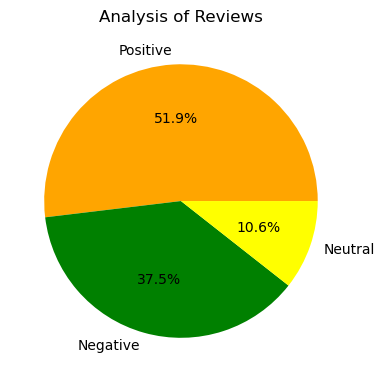

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Analysis of Reviews")
plt.pie(vader_counts.values, labels = vader_counts.index, colors = ['orange', 'green', 'yellow'], autopct='%1.1f%%', shadow=False)

# Wordcloud

Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing tags or keywords.

In [40]:
try:
    import wordcloud
    print("wordcloud is installed.")
except ImportError:
    print("wordcloud is not installed.")

wordcloud is not installed.


In [41]:
pip install wordcloud

     ------------------------------------ 152.1/152.1 kB 698.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [43]:
import numpy as np

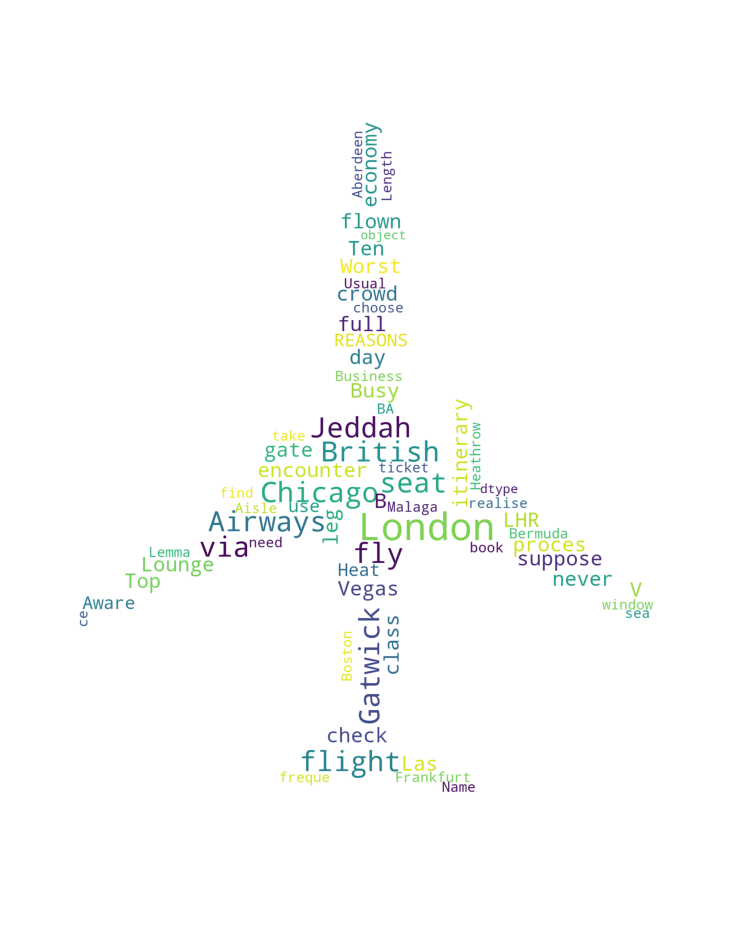

In [44]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
stopwords = set(STOPWORDS)

# Load a custom mask image (plane)
mask_image = np.array(Image.open('Plane_silhoutte.jpeg'))

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        mask=mask_image,
        random_state=1,)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    # Display the word cloud in the shape of the plane
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(rev_df.Lemma)

In [45]:
rev_df.to_csv("B_A_reviews.csv")